In [101]:
# Importing Libraries
import pandas as pd 
from pandas import DataFrame
import geopandas 

# Dataframe 
df_ports = pd.read_csv('ports.csv')
df_ports["PORT_NAME"].fillna("", inplace=True)

In [102]:
# Creating generic names for ports without name

for i in range(len(df_ports)):
    if df_ports.PORT_NAME[i] == "":
        df_ports.PORT_NAME[i] = "Port" + str(i)
df_ports.head(8)       

/Users/raquelcurutchet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,PORT_NAME,INDEX_NO,coords
0,49159,Terminal Pesquero Cta. Quiane,NaN,"((-70.31722387298942, -18.513597026467323),)"
1,49164,Oil Berth,NaN,"((-61.86886473007713, 17.150384410999997),)"
2,16,Port of Basamuk,NaN,"((146.14295817405977, -5.53913255687803),)"
3,26,Victoria,NaN,"((-123.32715191091728, 48.402783083729446),)"
4,34,Port4,NaN,"((126.50786074843957, 36.333661512471735),)"
5,36,Ladysmith Harbour,NaN,"((-123.7981702153305, 48.995376555249095),)"
6,80,Yura Ko,NaN,"((134.9560471628005, 34.28896299563348),)"
7,104,Bristol City Docks,NaN,"((-2.758243494577621, 51.491163074970245),)"


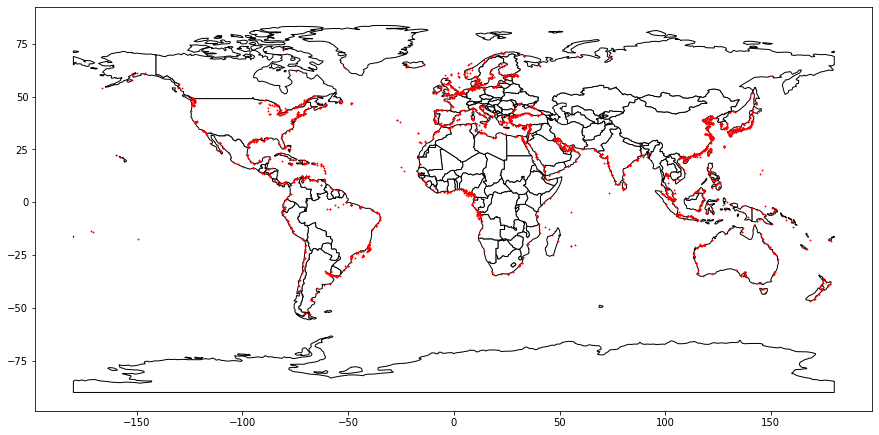

In [103]:
# Representing world ports

lat_list = []
long_list = []
for i in range(len(df_ports)):
    content = df_ports.coords[i]
    contentstr = str(content)
    longitude, latitude, parse = contentstr.split(",")
    latitude = latitude[:-2]
    longitude = longitude[2:]
    lat_list.append(float(latitude))
    long_list.append(float(longitude))
    
# Adding columns
df_ports["lat"] = lat_list
df_ports["long"] = long_list

gdf = geopandas.GeoDataFrame(df_ports, geometry=geopandas.points_from_xy(df_ports.long, df_ports.lat))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
base = world.plot(color='white', edgecolor='black', figsize =(15, 10))

gdf.plot(ax= base , marker='*', color='red', markersize= 1);

Those are all the ports in the world, recognized by the International Maritime Organization (IMO).  
Fun facts:
- Greenland and North Canada do not have many ports, mainly because of the icy conditions of the region. Recently it has been even more complicated to navigate around there due to big icebergs.
- Somalia does not account for many ports in Africa, but it does account for piracy boats, being one of the regions with most piracy events in the world.
- None of the 13 ports located in Artarctica were pictured, as it is a continent not owned, but shared by a few countries under the Antarctic Treaty.
- This is a WGS84 projection, where as you increase latitude to the North or the South, the distortion becomes greater. When calculating distances betweens 2 ports, for example, if distant from each other, spherical trigonometry has to be used for calculating passage distance and Estimated Time of Arrival (ETA) from one port to another.
- Latitudes and Longitudes are in radians, so it could be plotted in the graph.

In [94]:
#checking my current dataframe with my new columns
df_ports.head()

,Unnamed: 0,PORT_NAME,INDEX_NO,coords,lat,long,geometry
0,49159,Terminal Pesquero Cta. Quiane,NaN,"((-70.31722387298942, -18.513597026467323),)",-18.513597,-70.317224,POINT (-70.31722 -18.51360)
1,49164,Oil Berth,NaN,"((-61.86886473007713, 17.150384410999997),)",17.150384,-61.868865,POINT (-61.86886 17.15038)
2,16,Port of Basamuk,NaN,"((146.14295817405977, -5.53913255687803),)",-5.539133,146.142958,POINT (146.14296 -5.53913)
3,26,Victoria,NaN,"((-123.32715191091728, 48.402783083729446),)",48.402783,-123.327152,POINT (-123.32715 48.40278)
4,34,Port4,NaN,"((126.50786074843957, 36.333661512471735),)",36.333662,126.507861,POINT (126.50786 36.33366)


In [95]:
#Binary tree of ports in the North Hemisphere and South Hemisphere

class Node:
    def __init__(self, latitude, left = None, right = None):
        self.latitude = latitude
        self.left = left
        self.right = right
        
    def __str__(self):
        return str(self.latitude)
    
class Tree:
    def __init__(self):
        self.root = None
        
    def __str__(self, temp = None):
        if (self.root is None):
            print("Tree is empty")
        if (temp is None):
            return 
        else:
            self.__str__(temp.left)
            print("Latitude:",temp.__str__())
            self.__str__(temp.right)
       
        
    def add(self, latitude, temp = None):
        if(self.root is None):
            self.root = Node(latitude)
            return
        if (temp is None):
            temp = self.root
        if(latitude <= temp.latitude):   #South Hemisphere
            if (temp.left is None):
                temp.left = Node(latitude)
            else:
                self.add(latitude, temp.left)
        else:
            if (temp.right is None):     #North Hemisphere
                temp.right = Node(latitude)
            else: 
                self.add(latitude, temp.right)

In [96]:
# Testing tree
hem_tree = Tree()
hem_tree.__str__(hem_tree.root)
print("")
hem_tree.add("0") #Adding node "Equator", latitute = 0

# Creating Tree with latitutes
for i in range(len(lat_list)):
    my_lat = str(lat_list[i])
    hem_tree.add(my_lat)
hem_tree.__str__(hem_tree.root)

Tree is empty

Latitude: -0.008177
Latitude: -0.0566
Latitude: -0.06047
Latitude: -0.0661962954274087
Latitude: -0.1051
Latitude: -0.2796
Latitude: -0.40439
Latitude: -0.63055
Latitude: -0.64621003344655
Latitude: -0.69138
Latitude: -0.714499999999999
Latitude: -0.79699
Latitude: -0.8612
Latitude: -0.923715
Latitude: -0.93184
Latitude: -0.99942
Latitude: -1.0537
Latitude: -1.09590462
Latitude: -1.1081852
Latitude: -1.1721
Latitude: -1.229194999999999
Latitude: -1.2802346235
Latitude: -1.32764
Latitude: -1.40212275087833
Latitude: -1.42379592172801
Latitude: -1.44249892327934
Latitude: -1.4547
Latitude: -1.455
Latitude: -1.464999999999999
Latitude: -1.51756
Latitude: -1.532579999999999
Latitude: -1.7153
Latitude: -1.88724
Latitude: -1.899467878
Latitude: -1.95123
Latitude: -10.09707
Latitude: -10.24353
Latitude: -10.31955020036548
Latitude: -10.5725550977513
Latitude: -10.802122433
Latitude: -10.83936
Latitude: -10.84095545
Latitude: -11.03062237
Latitude: -11.06657969
Latitude: -11.079

Latitude: 1.483149166666666
Latitude: 1.49730083333333
Latitude: 1.565283333333333
Latitude: 1.615246666666666
Latitude: 1.66419
Latitude: 1.684939166666666
Latitude: 1.6947
Latitude: 1.756080833333333
Latitude: 1.785304166666666
Latitude: 1.804731910902794
Latitude: 1.8269
Latitude: 1.829009166666666
Latitude: 1.8536
Latitude: 1.894743461161851
Latitude: 10.064
Latitude: 10.12224
Latitude: 10.13553999999999
Latitude: 10.21093
Latitude: 10.23035
Latitude: 10.26302926708012
Latitude: 10.26326605584472
Latitude: 10.26650323
Latitude: 10.3005
Latitude: 10.32860936
Latitude: 10.350097165
Latitude: 10.354
Latitude: 10.365
Latitude: 10.3704
Latitude: 10.373015845
Latitude: 10.38309999999999
Latitude: 10.433
Latitude: 10.448616044
Latitude: 10.4583
Latitude: 10.482095
Latitude: 10.4927
Latitude: 10.4977
Latitude: 10.51482
Latitude: 10.51584791857749
Latitude: 10.5191681580618
Latitude: 10.53336743731051
Latitude: 10.54900999999999
Latitude: 10.60184
Latitude: 10.60328
Latitude: 10.625946311
L

Latitude: 30.16200583333333
Latitude: 30.1627
Latitude: 30.16552504152059
Latitude: 30.16617333333333
Latitude: 30.17668055
Latitude: 30.18610499999999
Latitude: 30.18697563
Latitude: 30.1882036216557
Latitude: 30.1945278
Latitude: 30.19615238998085
Latitude: 30.216458304
Latitude: 30.236043249
Latitude: 30.26375
Latitude: 30.2767200395464
Latitude: 30.2984975231811
Latitude: 30.30647973529994
Latitude: 30.31304880045354
Latitude: 30.3306419542059
Latitude: 30.338655
Latitude: 30.33958024810999
Latitude: 30.3471744619309
Latitude: 30.36067
Latitude: 30.36653917282819
Latitude: 30.36960627883672
Latitude: 30.3872
Latitude: 30.39577525
Latitude: 30.40062858257442
Latitude: 30.41105554
Latitude: 30.4231313
Latitude: 30.42489
Latitude: 30.4301
Latitude: 30.44038889
Latitude: 30.440865
Latitude: 30.45577
Latitude: 30.4568523773923
Latitude: 30.458424947
Latitude: 30.47165
Latitude: 30.472920736
Latitude: 30.48336186
Latitude: 30.50973
Latitude: 30.55436194
Latitude: 30.55991793517023
Latitu

Latitude: 41.48864
Latitude: 41.490940921
Latitude: 41.49295499999999
Latitude: 41.49580058
Latitude: 41.53
Latitude: 41.5661228215321
Latitude: 41.588200837
Latitude: 41.60223273
Latitude: 41.60344186238944
Latitude: 41.63369
Latitude: 41.665935
Latitude: 41.67007
Latitude: 41.67483
Latitude: 41.687167
Latitude: 41.70548499999999
Latitude: 41.7513091
Latitude: 41.7584
Latitude: 41.7733
Latitude: 41.782
Latitude: 41.783912409
Latitude: 41.78827414
Latitude: 41.79148223
Latitude: 41.79426196449999
Latitude: 41.79492
Latitude: 41.8042
Latitude: 41.84331
Latitude: 41.888085
Latitude: 41.90089
Latitude: 41.92135525349999
Latitude: 41.92713999999999
Latitude: 41.97097499999999
Latitude: 42.0
Latitude: 42.01950499999999
Latitude: 42.02932497
Latitude: 42.035907664
Latitude: 42.045095655
Latitude: 42.0452594795
Latitude: 42.055229795
Latitude: 42.074536629
Latitude: 42.08576808649999
Latitude: 42.0967
Latitude: 42.09755
Latitude: 42.1057129
Latitude: 42.1101
Latitude: 42.12427833333333
Latitu

Latitude: 71.32543493
Latitude: 71.8986
Latitude: 8.02488
Latitude: 8.16083333333333
Latitude: 8.16226831571454
Latitude: 8.23559
Latitude: 8.2486768432914
Latitude: 8.25056
Latitude: 8.25317833333333
Latitude: 8.25618916666666
Latitude: 8.321
Latitude: 8.3491
Latitude: 8.4864
Latitude: 8.48817
Latitude: 8.49619352
Latitude: 8.50275916666666
Latitude: 8.50907709399999
Latitude: 8.51890730671584
Latitude: 8.54390151
Latitude: 8.55693151708692
Latitude: 8.58012499999999
Latitude: 8.67312627844512
Latitude: 8.6823
Latitude: 8.767369505
Latitude: 8.856139811
Latitude: 8.87356918305158
Latitude: 8.951
Latitude: 8.96429
Latitude: 8.9922451134771
Latitude: 9.0009245742112
Latitude: 9.077116828
Latitude: 9.1469
Latitude: 9.2011005990207
Latitude: 9.21325
Latitude: 9.3562541110441
Latitude: 9.3704
Latitude: 9.37113245017826
Latitude: 9.37608506530523
Latitude: 9.39258
Latitude: 9.42989822477102
Latitude: 9.49867499999999
Latitude: 9.499
Latitude: 9.5186
Latitude: 9.5461
Latitude: 9.55842284
Lat

If we get all the nodes(latitudes) of the left side of the tree, we will notice that all of them will be on the South Hemisphere. Likewise, all nodes of the right side of the tree will be on the North Hemisphere. This way each "temp" node will have as "children" one port to its North and one port to its South. If you get to the end of the linked list, alternating between North and South, you might get the closest port to you, or the second closest. In an ocean passage, for example, it is quite important to know the closest ports to go to in case of an emergency.

In [97]:
class PortHash:
    def __init__(self, size = 20):
        self.size = size
        self.port = [[] for x in range (self.size)]
        self.coord = [[] for x in range (self.size)]
        
    def __str__(self):
        return(f'\nHashtable has {self.size} buckets with\n'
               f'port:\n'
               f' {self.port}\n'
               f'coord:\n'
               f' {self.coord}')
    
    def hash1(self, port, tablesize):
        sum = 0
        for pos in range(len(port)):
            sum = sum + ord(port[pos])
        return sum%tablesize
    
    def which_bin_in_hash(self, port, tablesize):
        hashvalue = self.hash1(port, self.size)
        port_bin = self.port[hashvalue]
        coord_bin = self.coord[hashvalue]
        return (port_bin, coord_bin)
    
    def put(self, port, coord):
        port_bin, coord_bin = self.which_bin_in_hash(port, self.size)
        if port_bin == None:
            port_bin.port = port
            coord_bin.coord = coord
        else:
            port_bin.append(port)
            coord_bin.append(coord)
        hashvalue = self.hash1(port, self.size)
        print("Port {:35} with coordinates {}".format(port,coord))
        
    def get(self, port):
        port_bin, coord_bin = self.which_bin_in_hash(port, self.size)
        try:
            position = port_bin.index(port)
            hashvalue = self.hash1(port, self.size)
            print(f'Found port {port_bin[position]} with coordinates long/lat"{coord_bin[position]}"'
                  f' in hash {hashvalue} as index {position}')
        except ValueError:
            print(f'Could not find the port {port} in the table')

In [98]:
port_hash = PortHash()
for i in range (len(df_ports)):
    port_hash.put(df_ports.PORT_NAME[i], df_ports.coords[i])
    
port_hash.__str__()

Port Terminal Pesquero Cta. Quiane       with coordinates ((-70.31722387298942, -18.513597026467323),)
Port Oil Berth                           with coordinates ((-61.86886473007713, 17.150384410999997),)
Port Port of Basamuk                     with coordinates ((146.14295817405977, -5.53913255687803),)
Port Victoria                            with coordinates ((-123.32715191091728, 48.402783083729446),)
Port Port4                               with coordinates ((126.50786074843957, 36.333661512471735),)
Port Ladysmith Harbour                   with coordinates ((-123.7981702153305, 48.995376555249095),)
Port Yura Ko                             with coordinates ((134.9560471628005, 34.28896299563348),)
Port Bristol City Docks                  with coordinates ((-2.758243494577621, 51.491163074970245),)
Port 4                                   with coordinates ((29.401222241448345, 60.03620322793722),)
Port 5a                                  with coordinates ((29.370157135380527, 60.0

Port alvheim offshore terminal           with coordinates ((1.99845, 59.567515),)
Port gijon                               with coordinates ((-5.686433355270713, 43.563135),)
Port sao francisco do sul                with coordinates ((-48.531688099621036, -26.200035),)
Port gimboa offshore terminal            with coordinates ((12.167151088560885, -7.54085),)
Port amamapare                           with coordinates ((136.80014077007297, -4.846435),)
Port GIRASSOL TERMINAL                   with coordinates ((11.732702104345188, -7.6488),)
Port LUTONG                              with coordinates ((113.85704828263607, 4.52988),)
Port AMBON                               with coordinates ((128.17500148715416, -3.682195),)
Port MISHIMA-KAWANOE KO                  with coordinates ((133.5173114874477, 34.01261),)
Port amchit                              with coordinates ((35.62690140772929, 34.140015000000005),)
Port sarpom offshore terminal            with coordinates ((8.460460000000001,

Port TARRAGONA                           with coordinates ((1.2093694112882996, 41.088475),)
Port kabil                               with coordinates ((104.151963575194, 1.069685),)
Port bullenbaai                          with coordinates ((-69.01958906504065, 12.189575000000001),)
Port pecem                               with coordinates ((-38.798738274790594, -3.51599),)
Port TARTUS                              with coordinates ((35.85729868879555, 34.943525),)
Port bunbury                             with coordinates ((115.65916662063954, -33.304105),)
Port bundaberg                           with coordinates ((152.4361429679376, -24.752405),)
Port TAWA                                with coordinates ((117.69817362819416, 4.2775099999999995),)
Port TANJUNG ARANG  (BUNYU)              with coordinates ((117.59116746217828, 3.26857),)
Port KAKINADA BAY                        with coordinates ((82.30708105212098, 16.965600000000002),)
Port BURGAS                              with coo

Port Port2037                            with coordinates ((144.57242038864618, -8.130344166666667),)
Port Port2038                            with coordinates ((-79.0330405153475, -8.230313333333333),)
Port Port2039                            with coordinates ((-78.57682406039044, -9.112766666666666),)
Port Port2040                            with coordinates ((103.97983617834063, 1.18655),)
Port Port2041                            with coordinates ((104.35243824268564, 1.3725595119407221),)
Port Port2042                            with coordinates ((104.62566628964103, 1.3658116666666666),)
Port Port2043                            with coordinates ((104.70553626943409, 1.4371658333333335),)
Port Port2044                            with coordinates ((103.15488846149456, 1.4831491666666667),)
Port Port2045                            with coordinates ((104.73441154502028, 1.497300833333333),)
Port Port2046                            with coordinates ((104.60349288548039, 1.4411724941908

Port No14                                with coordinates ((109.050969262, 19.8468035175),)
Port No8                                 with coordinates ((109.1240234995, 19.762358525499998),)
Port Mazhi Anchorage No2                 with coordinates ((122.21492109668515, 29.8834979715),)
Port Port2377                            with coordinates ((-82.0000069309026, 9.20110059902072),)
Port Port2378                            with coordinates ((-82.03317906707525, 8.99224511347711),)
Port Port2379                            with coordinates ((-82.06732593476772, 9.00092457421124),)
Port Port2380                            with coordinates ((-70.27501667300001, 11.6244367135),)
Port Duca degli Abruzzi                  with coordinates ((8.92916895130157, 44.39962824806571),)
Port Marina Molo Vecchio                 with coordinates ((8.92555688215074, 44.40901765599847),)
Port Marina Fiera di Genova              with coordinates ((8.93739679177892, 44.39462697599083),)
Port Port2384       

'\nHashtable has 20 buckets with\nport:\n [[\'Dockyard Port of Portsmouth\', \'DARU\', \'Dockyard Port of Portsmouth\', \'Ningbo-Zhoushan Gang(Zhoushan)\', \'Port159\', \'Sendai Ku\', \'San Francisco Bay, Anchorage Number 14\', \'San Francisco Bay, Anchorage Number 8A\', \'Çesme Harbour\', \'Tekirdag Liman\', \'Botas Harbour\', \'ADEN\', \'Ningbo-Zhoushan Gang(Zhoushan)\', \'E3\', \'TOMAKOMAI KO\', \'Seoul\', \'Janghang/Seocheon-gun\', \'Qingdao Gang\', \'BAHIA HERRADURA GUAYACAN\', \'Port of Muhammad Bin Qasim\', \'Port of Abbot Point\', \'Port of Weipa\', \'malabo\', \'PORT BOUET\', \'acapulco\', \'GAMBA OIL TERMINAL\', \'SAN JUAN\', \'SANTA MARTA\', \'santander\', \'TANJUNG SANTAN\', \'geraldton\', \'GHAZAOUET\', \'anacortes\', \'SURABAYA\', \'itaguai\', \'apra\', \'MIKINDANI\', \'muara banyu asin offshore\', \'naantali\', \'hamilton\', \'RESERVE\', \'batam kota\', \'HYDER\', \'stockholm\', \'SUNDSVALL\', \'supsa offshore terminal\', \'ISKENDERUN\', \'bodo\', \'paiton probolinggo po

In [99]:
# Getting input from user

def which_port_next():
    response = input("Where do you want to navigate to? North or South Hemisphere? Answer N or S: ")
    if response == "N":
        print("Here are your latitude options:")
        hem_tree.__str__(hem_tree.root.right)
        response2 = input("Which one would you like to pick? ")
        for i in range(20):
            for n in range(len(port_hash.coord[i])):
                if response2 in port_hash.coord[i][n]:
                    port_hash.get(port_hash.port[i][n])
        continuing = input("Do you want to check another Port? If YES, answer Y. If NO, press any other key: ")
        if continuing == "Y":
            which_port_next()
        else:
            print("Wishing you a favourable wind and calm seas.")
    elif response == "S":
        print("Here are your latitude options:")
        hem_tree.__str__(hem_tree.root.left)
        response3 = input("Which one would you like to pick? ")
        for i in range(20):
            for n in range(len(port_hash.coord[i])):
                if response3 in port_hash.coord[i][n]:
                    port_hash.get(port_hash.port[i][n])
        continuing2 = input("Do you want to check another Port? If YES, answer Y. If NO, press any other key: ")
        if continuing2 == "Y":
            which_port_next()
        else:
            print("Wishing you a favourable wind and calm seas.")
    else:
        print("It seems like you want to stay at the Equator. No problem. Wishing you a favourable wind and calm seas. ")

In [100]:
# Test youself
which_port_next()

Where do you want to navigate to? North or South Hemisphere? Answer N or S: N
Here are your latitude options:
Latitude: 0.02746
Latitude: 0.05643753
Latitude: 0.1005949999999999
Latitude: 0.122114605
Latitude: 0.3016
Latitude: 0.5286
Latitude: 0.714604999999999
Latitude: 0.71883
Latitude: 0.740000176499999
Latitude: 0.9916
Latitude: 1.01507
Latitude: 1.05193
Latitude: 1.06775
Latitude: 1.06968
Latitude: 1.07394
Latitude: 1.091664999999999
Latitude: 1.097016948499999
Latitude: 1.10487477
Latitude: 1.11274638
Latitude: 1.132500017
Latitude: 1.137666664
Latitude: 1.159166371
Latitude: 1.16054
Latitude: 1.164583344
Latitude: 1.17041668
Latitude: 1.1865
Latitude: 1.22556
Latitude: 1.305206659
Latitude: 1.346883284
Latitude: 1.365811666666666
Latitude: 1.372559511940722
Latitude: 1.3922119885683
Latitude: 1.408
Latitude: 1.4265
Latitude: 1.427955776
Latitude: 1.437165833333333
Latitude: 1.4411724941908
Latitude: 1.45468
Latitude: 1.483149166666666
Latitude: 1.49730083333333
Latitude: 1.56528

Latitude: 34.06447
Latitude: 34.1230878978967
Latitude: 34.12642
Latitude: 34.140015
Latitude: 34.1434551682323
Latitude: 34.1487595299258
Latitude: 34.1647
Latitude: 34.17385
Latitude: 34.177646585
Latitude: 34.1848
Latitude: 34.18725999999999
Latitude: 34.19951
Latitude: 34.2148907342925
Latitude: 34.22857456
Latitude: 34.22968
Latitude: 34.2323426945
Latitude: 34.23309
Latitude: 34.245123043
Latitude: 34.270239457
Latitude: 34.27882
Latitude: 34.2889629956334
Latitude: 34.32277
Latitude: 34.325
Latitude: 34.3342920346185
Latitude: 34.334365
Latitude: 34.33558
Latitude: 34.336442076601
Latitude: 34.36067135073244
Latitude: 34.36834295472388
Latitude: 34.37883246224373
Latitude: 34.3830745853483
Latitude: 34.38509
Latitude: 34.3886
Latitude: 34.3889226391911
Latitude: 34.3986196210607
Latitude: 34.4161403551697
Latitude: 34.42192437127232
Latitude: 34.44
Latitude: 34.4556015590205
Latitude: 34.46518676821142
Latitude: 34.47408302687108
Latitude: 34.478847971186
Latitude: 34.4798355270

Latitude: 45.226195
Latitude: 45.23122707
Latitude: 45.2570733333333
Latitude: 45.30147166
Latitude: 45.3048509499058
Latitude: 45.30486125964671
Latitude: 45.3127
Latitude: 45.31470188668773
Latitude: 45.322494981
Latitude: 45.329558285
Latitude: 45.334915453568
Latitude: 45.37144
Latitude: 45.40502475
Latitude: 45.40513916
Latitude: 45.4080866
Latitude: 45.41810232199999
Latitude: 45.418339194
Latitude: 45.42582544949999
Latitude: 45.4259273601016
Latitude: 45.44643
Latitude: 45.4810773627832
Latitude: 45.4935458
Latitude: 45.49838381
Latitude: 45.5562
Latitude: 45.560416644439
Latitude: 45.56464954745024
Latitude: 45.58696
Latitude: 45.5888
Latitude: 45.628670664
Latitude: 45.64458999999999
Latitude: 45.76483
Latitude: 45.76752
Latitude: 45.77502659
Latitude: 45.83222999999999
Latitude: 45.90901
Latitude: 45.91536416
Latitude: 45.9646541
Latitude: 45.9798
Latitude: 45.98492
Latitude: 46.00448258221149
Latitude: 46.0299583991129
Latitude: 46.03724
Latitude: 46.0569664074193
Latitude:

Which one would you like to pick? 9.55842284
Found port CP09-A with coordinates long/lat"((-75.91672283409886, 9.558422849),)" in hash 2 as index 114
Do you want to check another Port? If YES, answer Y. If NO, press any other key: Y
Where do you want to navigate to? North or South Hemisphere? Answer N or S: X
It seems like you want to stay at the Equator. No problem. Wishing you a favourable wind and calm seas. 


Hint of why I have chosen Latitude instead of the name of the port to be added into the Binary Tree:
- For sailors, during an emergency (as fuel or medical issues), it does not matter the name of the closest port, but how close it is. Names are not as relevant as coordinates;
- If you are on a boat in a latitute X, you want to go to the closest port to latitude X. Throught the input, you get the chance to choose the closest latitude to you (e.g. closest latitude to your gps at the time of observation). 
- Observe that, longitude is also important, and that's why it was inserted in the Hash Table. If longitude of a port is more than 2 or 3 degrees away from your longitude, you might want to reconsider your latitude choice. The which_port_next() function is there to provide you with other port possibilities.
- Longitude varies from 0 to -180 East and from 0 to 180 West; and Latitude from 0 to -90 South and 0 to 90 North. 
- It is true that there are more ports close to the same latitude (as observed on the map) than there is to the same longitude, which would not explain why i have chosen latitude in the first place. But here is another important point: Seasons.  To go off course, you can be close to a port, but due to the globe seasonality, weather conditions can prevent you from entering the port. Latitude is not just a coordinate: it is a weather message as well, before any weather forecast. 

Wishing you a favourable wind, calm seas and a great summer. 
                                                                    